# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [59]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://companies-market-cap-copy.vercel.app/index.html"

response = requests.get(url)

if response.status_code != 200:
    raise Exception(f"Error al acceder a la página: {response.status_code}")
if response:
    with open("archivo.csv", "wb") as dataset:
        dataset.write(response.content)
htmlWeb = response.text

htmlWeb

'\n<!DOCTYPE html>\n<html lang="en-US">\n<head>\n<title>Tesla (TSLA) - Revenue</title>\n<meta charset="utf-8"/>\n<link rel="shortcut icon" href="https://companiesmarketcap.com/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/img/icons/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/img/icons/apple-icon-60x60.png">\n<link rel="apple-touch-icon" sizes="72x72" href="/img/icons/apple-icon-72x72.png">\n<link rel="apple-touch-icon" sizes="76x76" href="/img/icons/apple-icon-76x76.png">\n<link rel="apple-touch-icon" sizes="114x114" href="/img/icons/apple-icon-114x114.png">\n<link rel="apple-touch-icon" sizes="120x120" href="/img/icons/apple-icon-120x120.png">\n<link rel="apple-touch-icon" sizes="144x144" href="/img/icons/apple-icon-144x144.png">\n<link rel="apple-touch-icon" sizes="152x152" href="/img/icons/apple-icon-152x152.png">\n<link rel="apple-touch-icon" sizes="180x180" href="/img/icons/apple-icon-180x180.png">\n<link rel="ic

In [60]:
soup = BeautifulSoup(htmlWeb, "html.parser")

tabla = soup.find("tbody")  
tabla

<tbody>
<tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr><tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr><tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr><tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr><tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr><tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr><tr><td><span class="year">2016</span></td><td>$7.00 B</td><td class="percentage-green">73.01%</td></tr><tr><td><span class="year">2015</span></td><td>$4

In [61]:
soup = BeautifulSoup(htmlWeb, "html.parser")
tabla = soup.find("tbody")  
filas = tabla.find_all("tr")

datos = []
for fila in filas: 
    cols = fila.find_all("td")
    fecha = cols[0].text.strip()
    ingresos = cols[1].text.strip()
    datos.append([fecha, ingresos])

datos

[['2024', '$97.15 B'],
 ['2023', '$96.77 B'],
 ['2022', '$81.46 B'],
 ['2021', '$53.82 B'],
 ['2020', '$31.53 B'],
 ['2019', '$24.57 B'],
 ['2018', '$21.46 B'],
 ['2017', '$11.75 B'],
 ['2016', '$7.00 B'],
 ['2015', '$4.04 B'],
 ['2014', '$3.19 B'],
 ['2013', '$2.01 B'],
 ['2012', '$0.41 B'],
 ['2011', '$0.20 B'],
 ['2010', '$0.11 B'],
 ['2009', '$0.11 B']]

In [62]:
import pandas as pd
df = pd.DataFrame(datos, columns=["Fecha", "Ingresos"])
df = df.sort_values("Fecha")
df

,Fecha,Ingresos
15,2009,$0.11 B
14,2010,$0.11 B
13,2011,$0.20 B
12,2012,$0.41 B
11,2013,$2.01 B
10,2014,$3.19 B
9,2015,$4.04 B
8,2016,$7.00 B
7,2017,$11.75 B
6,2018,$21.46 B


In [ ]:
def tranformar(valor):
    if "B" in valor:
         return float(valor.replace("B", "").replace("$", "").replace(",", ""))

df["Ingresos"] = df["Ingresos"].apply(tranformar)

df["Ingresos"]

15     0.11
14     0.11
13     0.20
12     0.41
11     2.01
10     3.19
9      4.04
8      7.00
7     11.75
6     21.46
5     24.57
4     31.53
3     53.82
2     81.46
1     96.77
0     97.15
Name: Ingresos, dtype: float64

In [24]:
conex = sqlite3.connect("VentasTesla.db")
cursor = conex.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS ingresos (
    fecha TEXT,
    ingresos REAL
)
""")

for index, row in df.iterrows():
    cursor.execute("INSERT INTO ingresos (fecha, ingresos) VALUES (?, ?)", (row["Fecha"], row["Ingresos"]))

conex.commit()
conex.close()

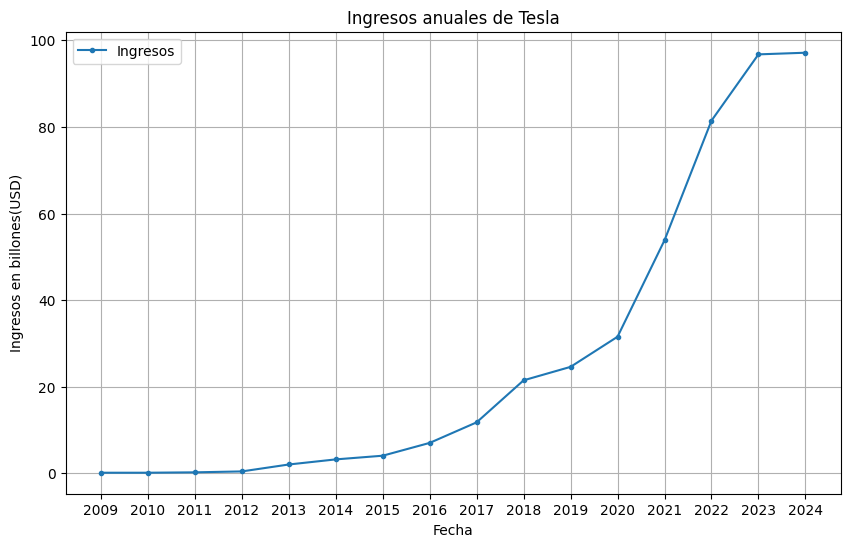

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df["Fecha"], df["Ingresos"], marker='.', label="Ingresos")
plt.title("Ingresos anuales de Tesla")
plt.xlabel("Fecha")
plt.ylabel("Ingresos en billones(USD)")
plt.legend()
plt.grid(True)
plt.show()

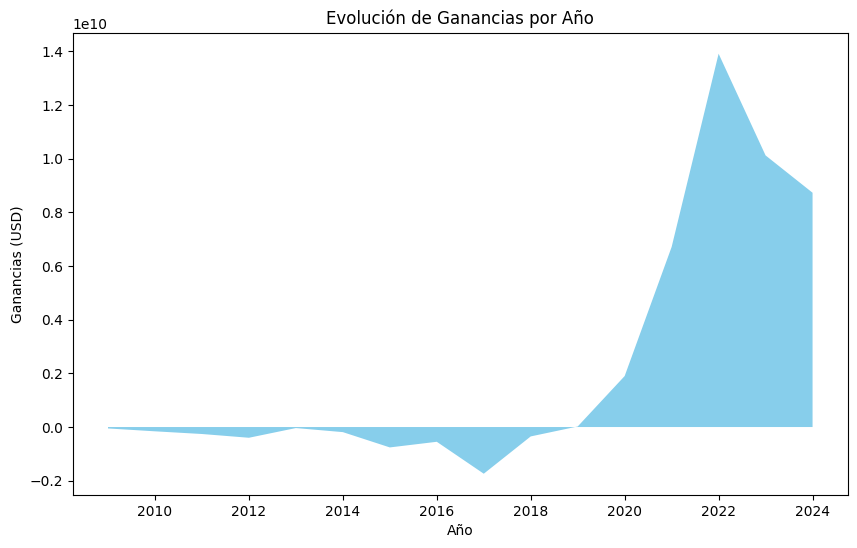

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Graficar los ingresos a lo largo del tiempo
plt.stackplot(df["Año"], df["Ganancias"], labels=["Ingresos"], colors=["skyblue"])

# Agregar etiquetas
plt.xlabel("Año")
plt.ylabel("Ganancias (USD)")
plt.title("Evolución de Ganancias por Año")

# Mostrar la gráfica
plt.show()

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://companies-market-cap-copy.vercel.app/earnings.html"

response = requests.get(url)
response.raise_for_status() 

respuesta = BeautifulSoup(response.text, "html.parser")

tabla = respuesta.find("table", {"class": "table"})  
filas = tabla.find_all("tr")[1:] 

datos = []
for fila in filas:
    columnas = fila.find_all("td")
    fecha = columnas[0].text.strip()
    ganancia = columnas[1].text.strip()
    datos.append({"Año": fecha, "Ganancias": ganancia})

datos

[{'Año': '2024', 'Ganancias': '$8.73 B'},
 {'Año': '2023', 'Ganancias': '$10.12 B'},
 {'Año': '2022', 'Ganancias': '$13.91 B'},
 {'Año': '2021', 'Ganancias': '$6.71 B'},
 {'Año': '2020', 'Ganancias': '$1.90 B'},
 {'Año': '2019', 'Ganancias': '$20 M'},
 {'Año': '2018', 'Ganancias': '-$0.35 Billion'},
 {'Año': '2017', 'Ganancias': '-$1.74 Billion'},
 {'Año': '2016', 'Ganancias': '-$0.55 Billion'},
 {'Año': '2015', 'Ganancias': '-$0.76 Billion'},
 {'Año': '2014', 'Ganancias': '-$0.19 Billion'},
 {'Año': '2013', 'Ganancias': '-$38.48 Million'},
 {'Año': '2012', 'Ganancias': '-$0.4 Billion'},
 {'Año': '2011', 'Ganancias': '-$0.26 Billion'},
 {'Año': '2010', 'Ganancias': '-$0.16 Billion'},
 {'Año': '2009', 'Ganancias': '-$53.19 Million'}]

In [51]:
def transformarGanancias(valor):
    valor = valor.replace(",", "").replace("$", "").strip()
    if "Billion" in valor: 
        return float(valor.replace("Billion", "")) * 1_000_000_000
    elif "Million" in valor:
        return float(valor.replace("Million", "")) * 1_000_000
    elif "M" in valor:  
        return float(valor.replace("M", "")) * 1_000_000
    elif "B" in valor:
        return float(valor.replace("B", "")) * 1_000_000_000
    else:
        return float(valor)
    
def year(value):
    return int(value.split()[0]) 
    
df = pd.DataFrame(datos)

df["Ganancias"] = df["Ganancias"].apply(transformarGanancias)
df["Año"] = df["Año"].apply(year)

df = df.sort_values("Año", ascending=False)

ultimaGanancia = df.iloc[0]
lastYear = df.iloc[0].astype(int)

print(f"Tesla ha tenido ingresos de {ultimaGanancia['Ganancias']:,.2f}€ en el año {lastYear['Año']}.")

Tesla ha tenido ingresos de 8,730,000,000.00€ en el año 2024.
